In [2]:
import pandas as pd

df = pd.read_csv('CC GENERAL.csv')

# df.info()
# df.head()
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [3]:
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [4]:
# 檢查 MINIMUM_PAYMENTS 是空值的人，他們的 BALANCE 情況
missing_min_pay = df[df['MINIMUM_PAYMENTS'].isnull()]
print(missing_min_pay['BALANCE'].describe())

count     313.000000
mean      555.441321
std      1292.687887
min         0.000000
25%         0.187069
50%        16.848358
75%       286.686616
max      9164.724752
Name: BALANCE, dtype: float64


In [5]:
# 刪除 CREDIT_LIMIT 為空的那一行
df.dropna(subset=['CREDIT_LIMIT'], inplace=True)


# 計算中位數 (使用中位數較不受極端值影響)
min_pay_median = df['MINIMUM_PAYMENTS'].median()

# 填補缺失值
df['MINIMUM_PAYMENTS'].fillna(min_pay_median, inplace=True)

# 再次檢查確認是否還有缺失值
print(df.isnull().sum())

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64


C:\Users\peter\AppData\Local\Temp\ipykernel_38000\1490799778.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MINIMUM_PAYMENTS'].fillna(min_pay_median, inplace=True)


In [6]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000
mean,1564.647593,0.877350,1003.316936,592.503572,411.113579,978.959616,0.490405,0.202480,0.364478,0.135141,3.249078,14.711476,4494.449450,1733.336511,845.003358,0.153732,11.517935
std,2081.584016,0.236798,2136.727848,1659.968851,904.378205,2097.264344,0.401360,0.298345,0.397451,0.200132,6.824987,24.858552,3638.815725,2895.168146,2332.905284,0.292511,1.337134
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.365782,0.888889,39.800000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.282850,170.875613,0.000000,12.000000
50%,873.680279,1.000000,361.490000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,857.062706,312.452292,0.000000,12.000000
75%,2054.372848,1.000000,1110.170000,577.830000,468.650000,1113.868654,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.279320,788.721609,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


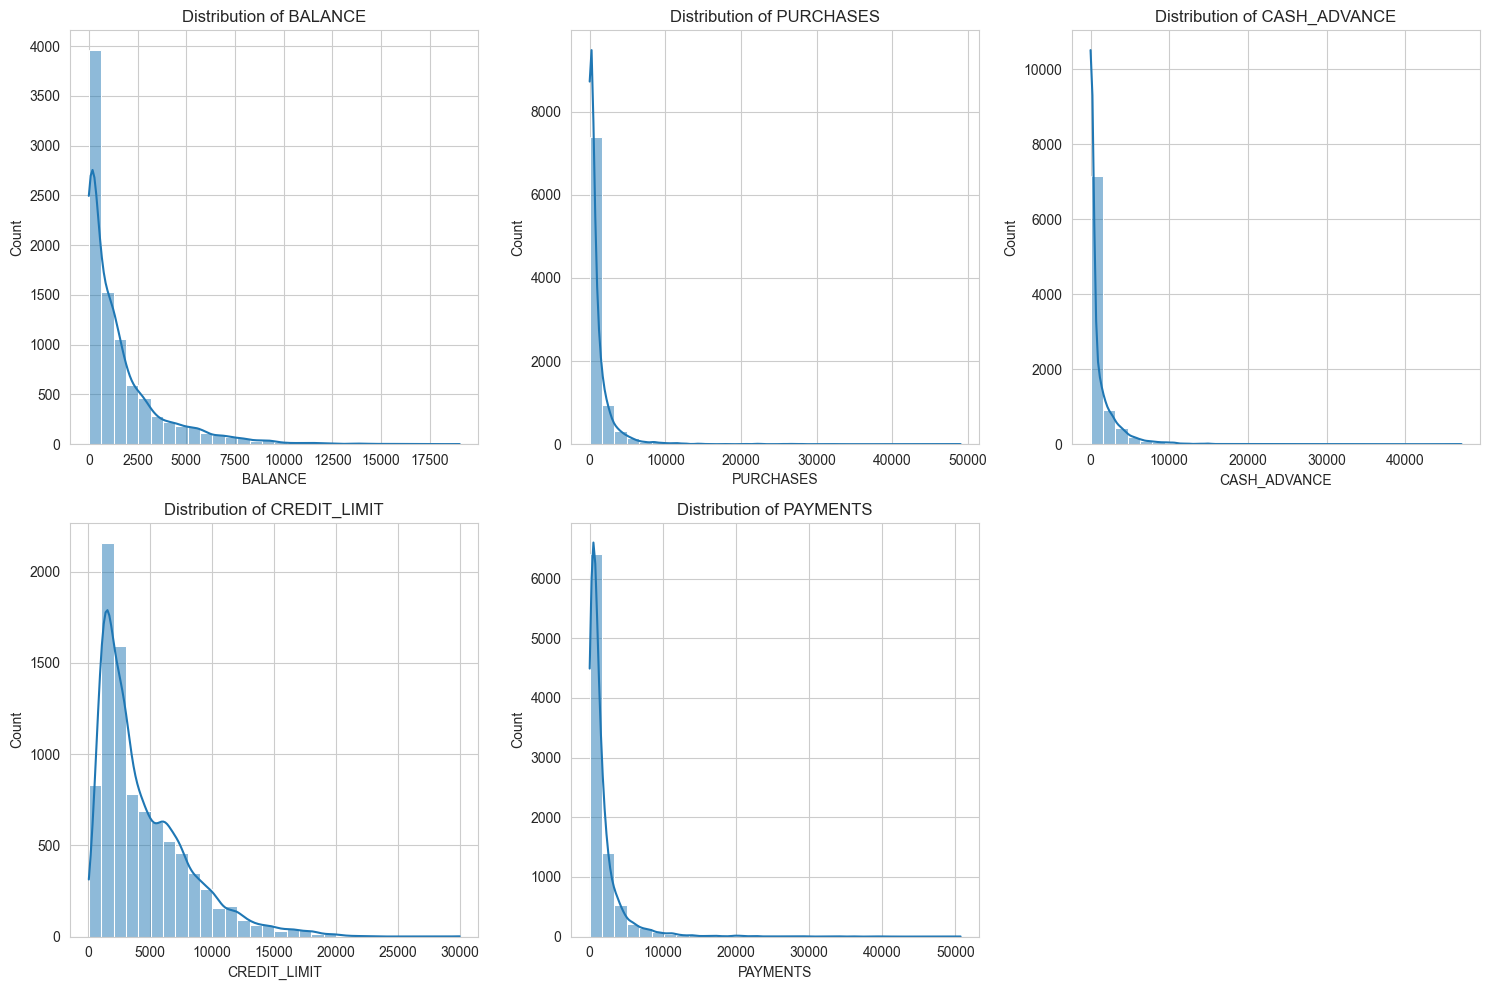

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# 設定圖表風格
sns.set_style("whitegrid")

# 我們先挑幾個重點欄位來看分佈
cols_to_plot = ['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS']

plt.figure(figsize=(15, 10))
for i, col in enumerate(cols_to_plot):
    plt.subplot(2, 3, i+1)
    kde=True #會畫出那條平滑的密度曲線
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

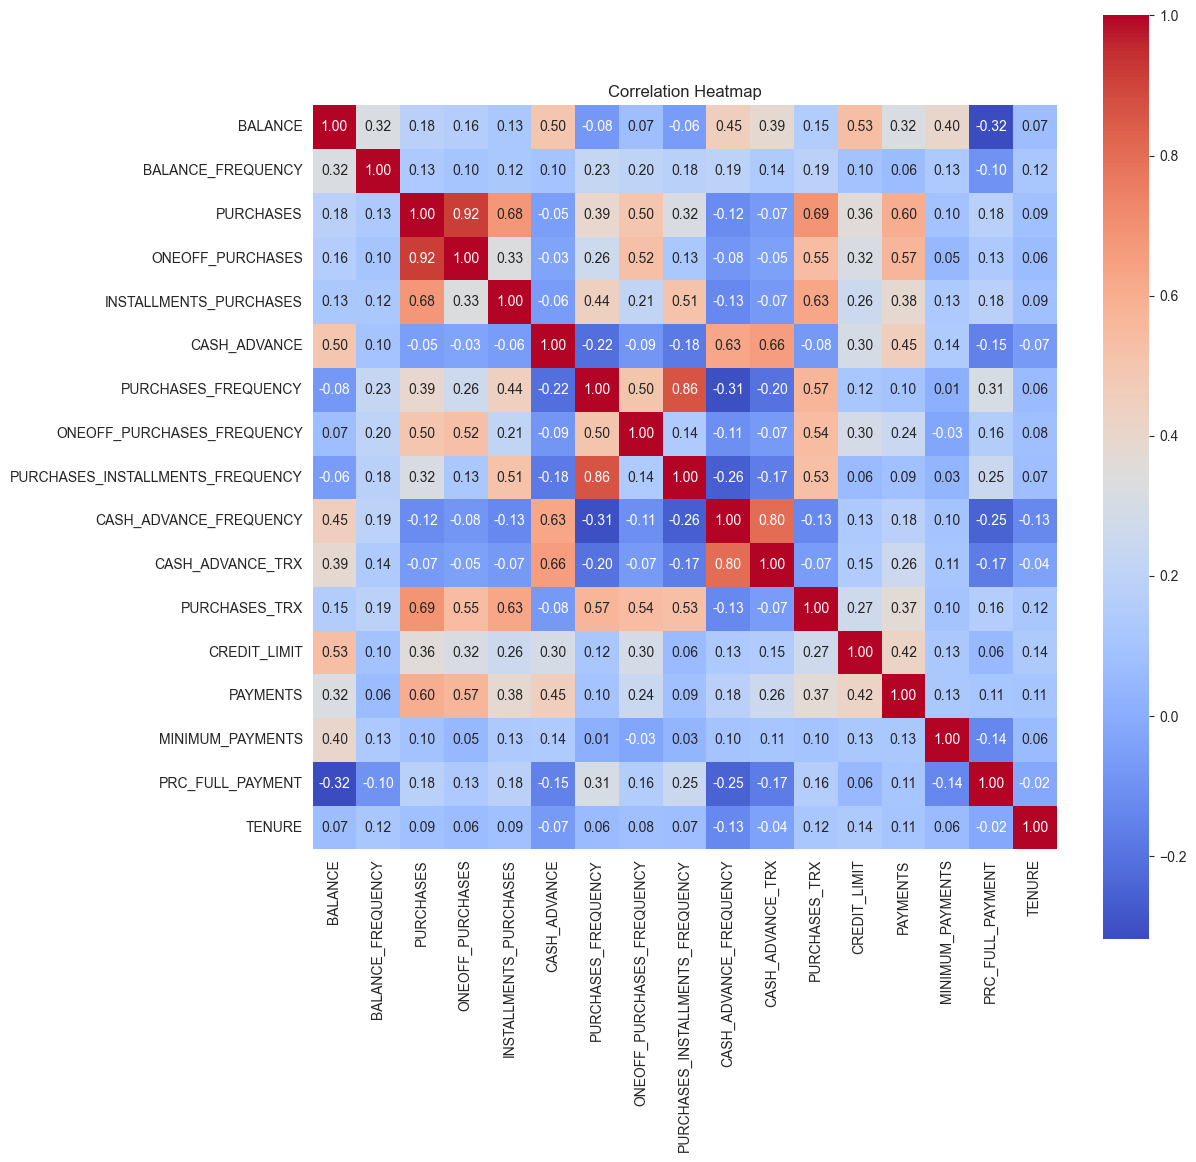

In [8]:
plt.figure(figsize=(12, 12))
# 計算相關係數矩陣
df_without_custid = df.drop(columns=['CUST_ID'])
corr_matrix = df_without_custid.corr()
# 畫出熱力圖，annot=True 會顯示數字，cmap='coolwarm' 是冷暖色調
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

In [9]:
from sklearn.preprocessing import StandardScaler

# 除去 ID 欄位，因為 ID 對分群沒意義
cols_to_use = df.columns.drop('CUST_ID')

# 實例化 Scaler
scaler = StandardScaler()

# 轉換資料
df_scaled = scaler.fit_transform(df[cols_to_use])

# 轉回 DataFrame 以便查看 (這步只是為了檢查，之後建模用 array 即可)
import pandas as pd
df_scaled_df = pd.DataFrame(df_scaled, columns=cols_to_use)

print("標準化完成，現在所有欄位的 Mean 都是 0，Std 都是 1")
print(df_scaled_df.describe().round(2))

標準化完成，現在所有欄位的 Mean 都是 0，Std 都是 1
       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
count  8949.00            8949.00    8949.00           8949.00   
mean      0.00               0.00       0.00             -0.00   
std       1.00               1.00       1.00              1.00   
min      -0.75              -3.71      -0.47             -0.36   
25%      -0.69               0.05      -0.45             -0.36   
50%      -0.33               0.52      -0.30             -0.33   
75%       0.24               0.52       0.05             -0.01   
max       8.40               0.52      22.48             24.20   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count                 8949.00       8949.00              8949.00   
mean                     0.00         -0.00                -0.00   
std                      1.00          1.00                 1.00   
min                     -0.45         -0.47                -1.22   
25%                     -0.45   

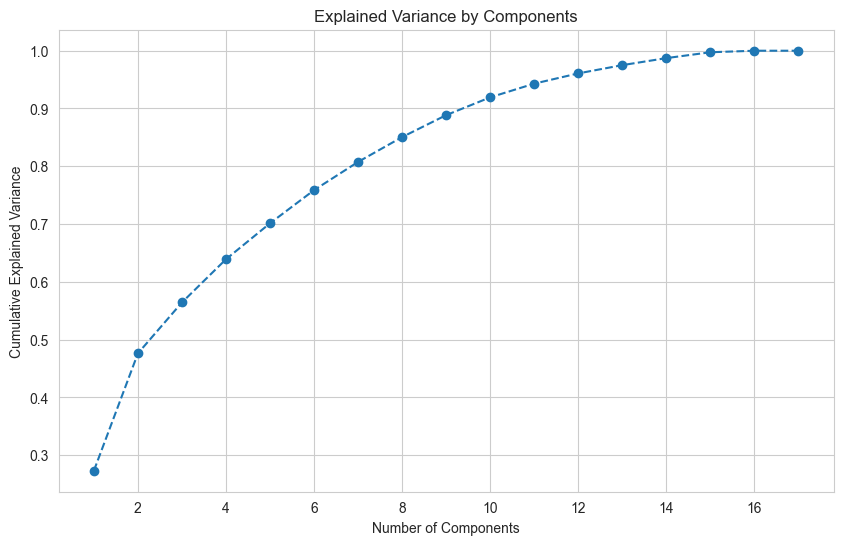

In [10]:
from sklearn.decomposition import PCA

# 我們先設定 components 為 17 (全取)，看看解釋力
pca = PCA(n_components=17)
pca.fit(df_scaled)

# 畫出解釋變異 (Explained Variance)
plt.figure(figsize=(10,6))
plt.plot(range(1, 18), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

降維完成！新的資料集長相：
      PCA_1     PCA_2     PCA_3     PCA_4     PCA_5     PCA_6     PCA_7  \
0 -1.683768 -1.072570 -0.477244  0.679144 -0.043123 -0.069705 -0.821505   
1 -1.134846  2.508738 -0.603529 -0.110178 -0.668379  1.096278  0.385953   
2  0.969060 -0.383487 -0.092648  1.236655  2.166478  0.332914  1.540257   
3 -0.888423  0.004393 -1.501618  1.073551 -0.226286  0.169366  0.236559   
4 -1.600261 -0.684049 -0.349762  1.012481  0.454576 -0.076857 -0.697249   

      PCA_8     PCA_9  
0 -0.018196  0.119090  
1  0.176700  0.675836  
2 -0.230296 -0.868963  
3 -0.690792 -0.064210  
4  0.246259  0.578784  


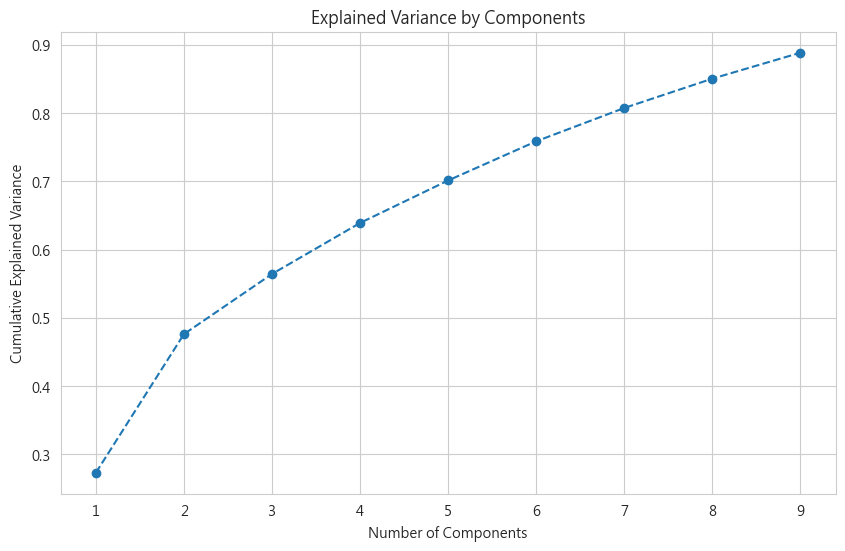

In [20]:
# 設定為 9 個主成分
pca = PCA(n_components=9)

# 執行降維
pca_data = pca.fit_transform(df_scaled)

# 為了方便後續操作，我們把它轉回 DataFrame 格式
pca_df = pd.DataFrame(pca_data, columns=[f'PCA_{i}' for i in range(1, 10)])

print("降維完成！新的資料集長相：")
print(pca_df.head())

# 畫出解釋變異 (Explained Variance)
plt.figure(figsize=(10,6))
plt.plot(range(1, 10), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

正在嘗試各種分群數量，這可能需要幾秒鐘...


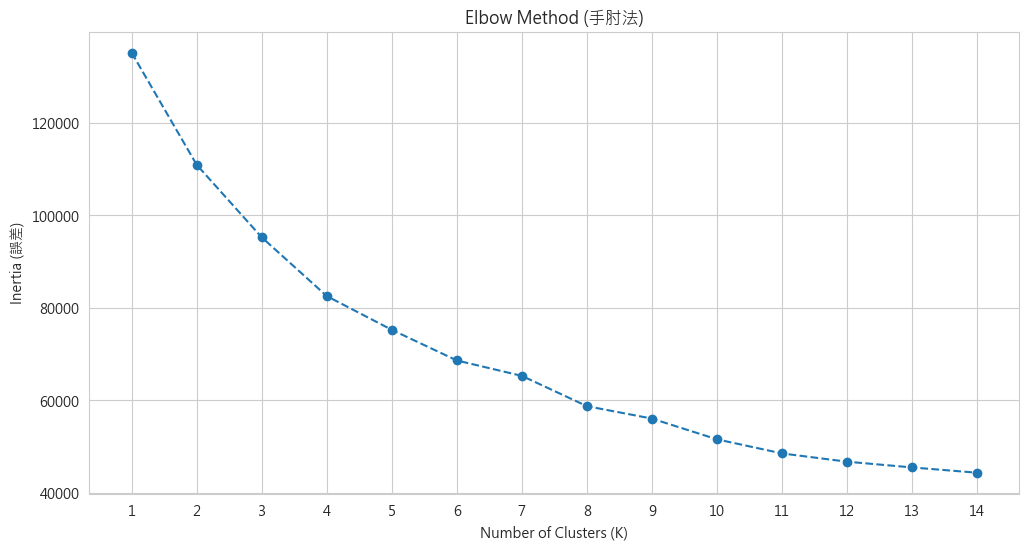

In [22]:
from sklearn.cluster import KMeans

# print(pca_df)

inertia = []
K_range = range(1, 15)  # 試著分 1 到 14 群

print("正在嘗試各種分群數量，這可能需要幾秒鐘...")

for k in K_range:
    # random_state=42 是為了確保每次跑結果一樣
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(pca_df)
    inertia.append(kmeans.inertia_)

# 1. 設定中文字型：指定使用 'Microsoft JhengHei' (微軟正黑體)
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 

# 2. 修正負號顯示問題：
# 設定了中文字型後，負號 '-' 有時候會變成方塊，這行把它修好
plt.rcParams['axes.unicode_minus'] = False 


# 畫圖
plt.figure(figsize=(12, 6))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.title('Elbow Method (手肘法)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (誤差)')
plt.xticks(K_range)
plt.grid(True)
plt.show()

In [13]:
from sklearn.metrics import silhouette_score

# 我們針對這幾個可能的候選人來算分數
candidates = [3, 4, 5, 6, 7, 8]

print("正在計算輪廓係數 (Silhouette Score)...")

for k in candidates:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(pca_df) # 記得用降維後的資料
    score = silhouette_score(pca_df, kmeans.labels_)
    print(f"K = {k}, Silhouette Score = {score:.4f}")

正在計算輪廓係數 (Silhouette Score)...
K = 3, Silhouette Score = 0.2626
K = 4, Silhouette Score = 0.2270
K = 5, Silhouette Score = 0.2180
K = 6, Silhouette Score = 0.2309
K = 7, Silhouette Score = 0.2186
K = 8, Silhouette Score = 0.2521


In [14]:
# 1. 設定模型 K=4
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)

# 2. 訓練並預測
# 注意：這裡我們要用 pca_df (降維後的資料)
cluster_labels = kmeans.fit_predict(pca_df)

# 3. 把標籤貼回「原始」資料集 df 和 pca_df
# 這樣我們才能看到真實的消費金額
df['Cluster'] = cluster_labels
pca_df['Cluster'] = cluster_labels

print("分群完成！已將 Cluster 標籤貼回資料表。")
print(df['Cluster'].value_counts()) # 看看每一群有多少人

分群完成！已將 Cluster 標籤貼回資料表。
Cluster
1    4085
3    3386
0    1222
2     256
Name: count, dtype: int64


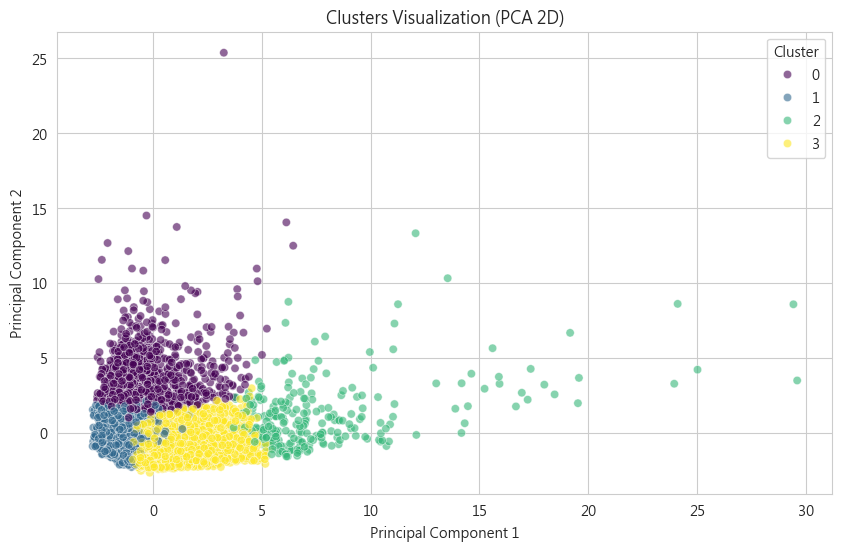

In [15]:
plt.figure(figsize=(10, 6))
# 使用 seaborn 畫散佈圖，hue='Cluster' 會自動按群組上色
sns.scatterplot(x='PCA_1', y='PCA_2', hue='Cluster', data=pca_df, palette='viridis', alpha=0.6)
plt.title('Clusters Visualization (PCA 2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

In [16]:
# 針對每一群，計算各個欄位的平均值
cluster_summary = df.groupby('Cluster')[['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 
                                         'INSTALLMENTS_PURCHASES', 'ONEOFF_PURCHASES', 
                                         'CREDIT_LIMIT', 'PRC_FULL_PAYMENT']].mean()

# 為了方便閱讀，我們轉置表格，並四捨五入
print(cluster_summary.T.round(2))

Cluster                       0        1         2        3
BALANCE                 4556.54   992.80   4088.82   983.94
PURCHASES                512.59   278.22   9643.51  1401.96
CASH_ADVANCE            4490.32   571.71    786.01   217.63
INSTALLMENTS_PURCHASES   185.94    67.68   3152.63   699.43
ONEOFF_PURCHASES         326.74   210.86   6493.22   702.72
CREDIT_LIMIT            7494.32  3270.39  10543.95  4431.18
PRC_FULL_PAYMENT           0.04     0.08      0.30     0.27


In [17]:
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler

# 1. 為了畫圖漂亮，我們需要把數據縮放到 0-1 之間 (因為金額大小差太多了)
# 我們只選幾個關鍵特徵來畫
features_to_plot = ['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 
                    'INSTALLMENTS_PURCHASES', 'ONEOFF_PURCHASES', 'PRC_FULL_PAYMENT']

scaler = MinMaxScaler()
df_radar = pd.DataFrame(scaler.fit_transform(df[features_to_plot]), columns=features_to_plot)
df_radar['Cluster'] = df['Cluster']

# 2. 計算每一群的平均值
radar_summary = df_radar.groupby('Cluster').mean()

# 3. 使用 Plotly 畫互動式雷達圖
fig = go.Figure()

colors = ['#FF0000', '#00FF00', '#0000FF', '#FFA500'] # 紅綠藍橘
cluster_names = ['Cluster 0: 風險變現族', 'Cluster 1: 沉睡戶', 'Cluster 2: VIP大戶', 'Cluster 3: 活躍小資']

for i in range(4):
    fig.add_trace(go.Scatterpolar(
        r=radar_summary.iloc[i].values,
        theta=features_to_plot,
        fill='toself',
        name=cluster_names[i],
        line_color=colors[i],
        opacity=0.6
    ))

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 1]
        )),
    title="銀行客戶分群雷達圖 (Customer Segmentation Radar Chart)",
    showlegend=True
)

fig.show()

In [18]:
# --- 改良版雷達圖資料準備 ---

# 1. 複製一份數據以免影響原始 df
df_radar_pre = df[features_to_plot].copy()

# 2. 關鍵步驟：去極值 (Capping)
# 我們把所有欄位超過 95% 分位數的值，都壓回 95% 的數值
# 這樣可以避免少數「超級大戶」把整個比例尺拉壞
for col in features_to_plot:
    upper_limit = df_radar_pre[col].quantile(0.95) # 找出該欄位的前 5% 門檻
    df_radar_pre[col] = df_radar_pre[col].clip(upper=upper_limit)

# 3. 再次標準化 (現在沒有極端值干擾，0-1 的分佈會更均勻)
scaler = MinMaxScaler()
df_radar = pd.DataFrame(scaler.fit_transform(df_radar_pre), columns=features_to_plot)
df_radar['Cluster'] = df['Cluster']

# 4. 計算平均值
radar_summary = df_radar.groupby('Cluster').mean()

# --- 繪圖部分 (這部分不用變，直接執行即可) ---
import plotly.graph_objects as go

fig = go.Figure()
colors = ['#FF0000', '#00FF00', '#0000FF', '#FFA500']
cluster_names = ['Cluster 0: 風險變現族', 'Cluster 1: 沉睡戶', 'Cluster 2: VIP大戶', 'Cluster 3: 活躍小資']

for i in range(4):
    fig.add_trace(go.Scatterpolar(
        r=radar_summary.iloc[i].values,
        theta=features_to_plot,
        fill='toself',
        name=cluster_names[i],
        line_color=colors[i],
        opacity=0.6
    ))

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 1] # 固定範圍，方便比較
        )),
    title="銀行客戶分群雷達圖 (優化版：去極端值)",
    showlegend=True
)

fig.show()